In [1]:
#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
import mahotas
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import h5py

#--------------------
# tunable-parameters
#--------------------

images_class_covid       = 1230
images_class_non_covid   = 1230

fixed_size             = tuple((150, 150))

train_path             = "Dataset/archive"
h5_train_data          = 'Output/train_data_covid_19.h5'
h5_train_labels        = 'Output/train_labels_covid_19.h5'
# bins                   = 8
bins                   = 2

1229 non-COVID images
1229 COVID images


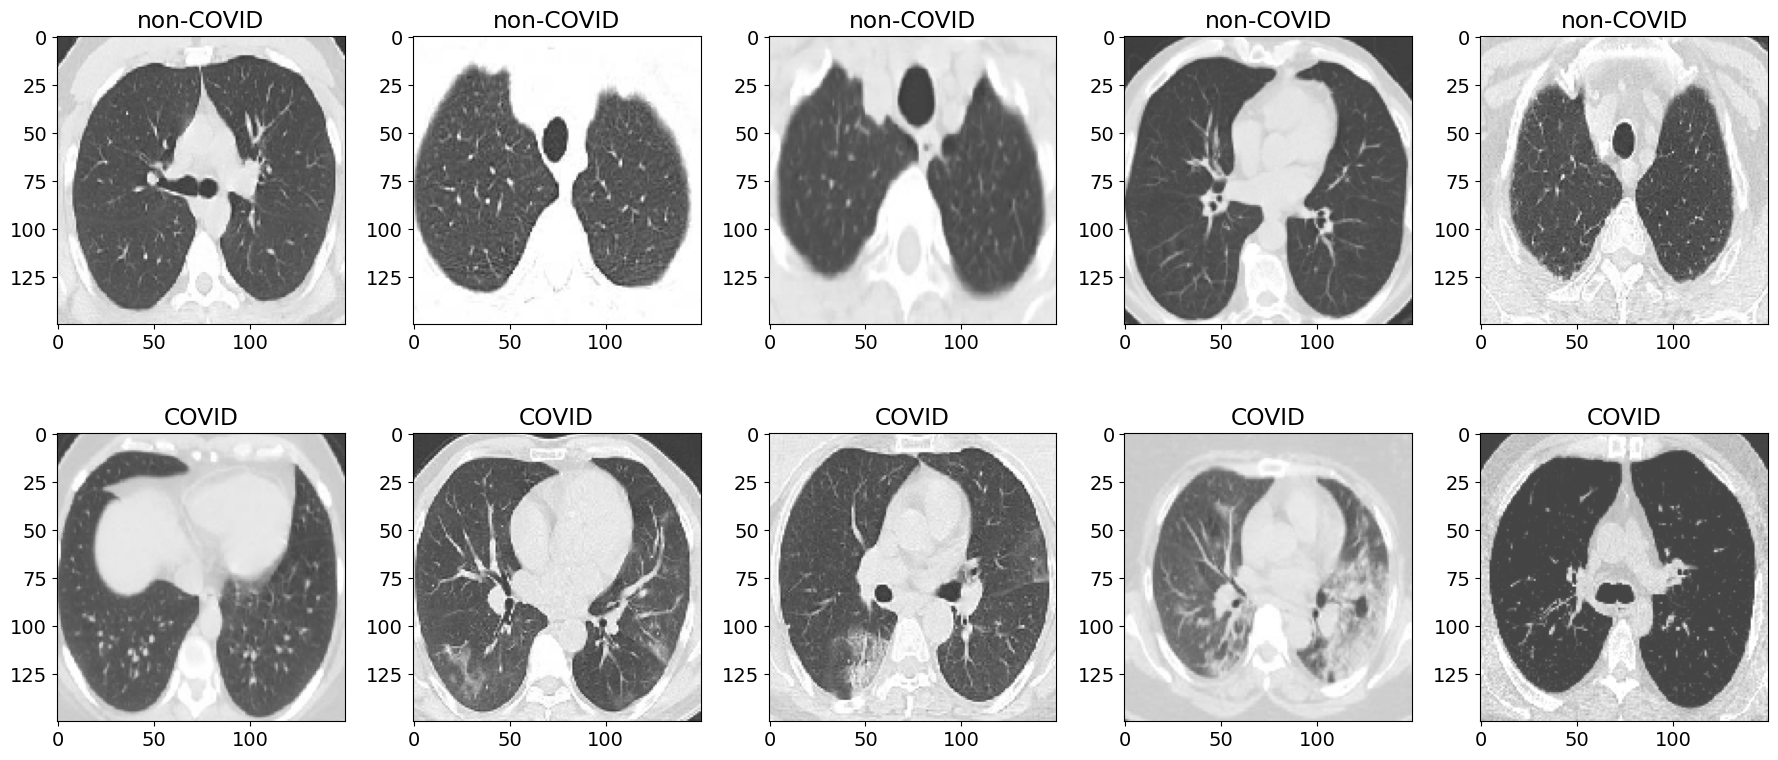

In [2]:

# display some images for every different expression

# size of the image: 48*48 pixels
#pic_size = 48
pic_size_h = 150
pic_size_w = 150

# input path for the images
# base_path = "Users/rahuldebmohalder/codetest/Dataset/"
base_path = "Dataset/"

plt.rcParams.update({'font.size': 14})
plt.figure(0, figsize=(18,12))
cpt = 0
for expression in os.listdir(base_path + "archive/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(3,5,cpt)
        img = load_img(base_path + "archive/" + expression + "/" +os.listdir(base_path + "archive/" + expression)[i], target_size=(pic_size_h, pic_size_w))
        plt.imshow(img, cmap="gray")
        plt.title(expression)

    print(str(len(os.listdir(base_path + "archive/" + expression))) + " " + expression + " images")
plt.savefig('covid_19_dataset.png')
plt.savefig('covid_19_dataset.eps')
plt.tight_layout()
plt.show()



In [3]:
# Converting each image to RGB from BGR format

def rgb_bgr(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_img


In [4]:
# Conversion to HSV image format from RGB

def bgr_hsv(rgb_img):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    return hsv_img

In [5]:
# image segmentation

# for extraction of green and brown color

# kaggle image color code
# lower = np.array([0, 0, 233])
# upper = np.array([179, 255, 255])

def img_segmentation(rgb_img,hsv_img):
#     lower_green = np.array([25,0,20])
#     upper_green = np.array([100,255,255])
#     healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
#     result = cv2.bitwise_and(rgb_img,rgb_img, mask=healthy_mask)
    tumor_lower_color = np.array([0,0,152])
    tumor_upper_color = np.array([179,255,255])
    disease_mask = cv2.inRange(hsv_img, tumor_lower_color, tumor_upper_color)
    disease_result = cv2.bitwise_and(rgb_img, rgb_img, mask=disease_mask)
    final_result = disease_result
    return final_result

#     final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=disease_mask)
#     return final_result
    
#     final_mask = healthy_mask + disease_mask
#     final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)
#     return final_result



In [6]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [7]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [8]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [9]:
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['COVID', 'non-COVID']


In [10]:
# loop over the training data sub-folders
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    # loop over the images in each sub-folder
    for x in range(1,1230):
        # get the image file name
        file = dir + "/A(" + str(x) + ").png"
#         file = dir + "/A" + str(x) + ".jpeg"
        print(file)

        # read the image and resize it to a fixed-size
        #image = cv2.imread(file)
        image = cv2.imread(file, cv2.IMREAD_UNCHANGED)

        image = cv2.resize(image, fixed_size)

        
        # Running Function Bit By Bit
        
#         RGB_BGR       = rgb_bgr(image)
#         BGR_HSV       = bgr_hsv(RGB_BGR)
#         IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)

        # Call for Global Fetaure Descriptors
        
#         fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
#         fv_haralick   = fd_haralick(IMG_SEGMENT)
#         fv_histogram  = fd_histogram(IMG_SEGMENT)
        
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)
        
        # Concatenate 
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

Dataset/archive/COVID/A(1).png
Dataset/archive/COVID/A(2).png
Dataset/archive/COVID/A(3).png
Dataset/archive/COVID/A(4).png
Dataset/archive/COVID/A(5).png
Dataset/archive/COVID/A(6).png
Dataset/archive/COVID/A(7).png
Dataset/archive/COVID/A(8).png
Dataset/archive/COVID/A(9).png
Dataset/archive/COVID/A(10).png
Dataset/archive/COVID/A(11).png
Dataset/archive/COVID/A(12).png
Dataset/archive/COVID/A(13).png
Dataset/archive/COVID/A(14).png
Dataset/archive/COVID/A(15).png
Dataset/archive/COVID/A(16).png
Dataset/archive/COVID/A(17).png
Dataset/archive/COVID/A(18).png
Dataset/archive/COVID/A(19).png
Dataset/archive/COVID/A(20).png
Dataset/archive/COVID/A(21).png
Dataset/archive/COVID/A(22).png
Dataset/archive/COVID/A(23).png
Dataset/archive/COVID/A(24).png
Dataset/archive/COVID/A(25).png
Dataset/archive/COVID/A(26).png
Dataset/archive/COVID/A(27).png
Dataset/archive/COVID/A(28).png
Dataset/archive/COVID/A(29).png
Dataset/archive/COVID/A(30).png
Dataset/archive/COVID/A(31).png
Dataset/archive/C

Dataset/archive/COVID/A(253).png
Dataset/archive/COVID/A(254).png
Dataset/archive/COVID/A(255).png
Dataset/archive/COVID/A(256).png
Dataset/archive/COVID/A(257).png
Dataset/archive/COVID/A(258).png
Dataset/archive/COVID/A(259).png
Dataset/archive/COVID/A(260).png
Dataset/archive/COVID/A(261).png
Dataset/archive/COVID/A(262).png
Dataset/archive/COVID/A(263).png
Dataset/archive/COVID/A(264).png
Dataset/archive/COVID/A(265).png
Dataset/archive/COVID/A(266).png
Dataset/archive/COVID/A(267).png
Dataset/archive/COVID/A(268).png
Dataset/archive/COVID/A(269).png
Dataset/archive/COVID/A(270).png
Dataset/archive/COVID/A(271).png
Dataset/archive/COVID/A(272).png
Dataset/archive/COVID/A(273).png
Dataset/archive/COVID/A(274).png
Dataset/archive/COVID/A(275).png
Dataset/archive/COVID/A(276).png
Dataset/archive/COVID/A(277).png
Dataset/archive/COVID/A(278).png
Dataset/archive/COVID/A(279).png
Dataset/archive/COVID/A(280).png
Dataset/archive/COVID/A(281).png
Dataset/archive/COVID/A(282).png
Dataset/ar

Dataset/archive/COVID/A(502).png
Dataset/archive/COVID/A(503).png
Dataset/archive/COVID/A(504).png
Dataset/archive/COVID/A(505).png
Dataset/archive/COVID/A(506).png
Dataset/archive/COVID/A(507).png
Dataset/archive/COVID/A(508).png
Dataset/archive/COVID/A(509).png
Dataset/archive/COVID/A(510).png
Dataset/archive/COVID/A(511).png
Dataset/archive/COVID/A(512).png
Dataset/archive/COVID/A(513).png
Dataset/archive/COVID/A(514).png
Dataset/archive/COVID/A(515).png
Dataset/archive/COVID/A(516).png
Dataset/archive/COVID/A(517).png
Dataset/archive/COVID/A(518).png
Dataset/archive/COVID/A(519).png
Dataset/archive/COVID/A(520).png
Dataset/archive/COVID/A(521).png
Dataset/archive/COVID/A(522).png
Dataset/archive/COVID/A(523).png
Dataset/archive/COVID/A(524).png
Dataset/archive/COVID/A(525).png
Dataset/archive/COVID/A(526).png
Dataset/archive/COVID/A(527).png
Dataset/archive/COVID/A(528).png
Dataset/archive/COVID/A(529).png
Dataset/archive/COVID/A(530).png
Dataset/archive/COVID/A(531).png
Dataset/ar

Dataset/archive/COVID/A(756).png
Dataset/archive/COVID/A(757).png
Dataset/archive/COVID/A(758).png
Dataset/archive/COVID/A(759).png
Dataset/archive/COVID/A(760).png
Dataset/archive/COVID/A(761).png
Dataset/archive/COVID/A(762).png
Dataset/archive/COVID/A(763).png
Dataset/archive/COVID/A(764).png
Dataset/archive/COVID/A(765).png
Dataset/archive/COVID/A(766).png
Dataset/archive/COVID/A(767).png
Dataset/archive/COVID/A(768).png
Dataset/archive/COVID/A(769).png
Dataset/archive/COVID/A(770).png
Dataset/archive/COVID/A(771).png
Dataset/archive/COVID/A(772).png
Dataset/archive/COVID/A(773).png
Dataset/archive/COVID/A(774).png
Dataset/archive/COVID/A(775).png
Dataset/archive/COVID/A(776).png
Dataset/archive/COVID/A(777).png
Dataset/archive/COVID/A(778).png
Dataset/archive/COVID/A(779).png
Dataset/archive/COVID/A(780).png
Dataset/archive/COVID/A(781).png
Dataset/archive/COVID/A(782).png
Dataset/archive/COVID/A(783).png
Dataset/archive/COVID/A(784).png
Dataset/archive/COVID/A(785).png
Dataset/ar

Dataset/archive/COVID/A(1005).png
Dataset/archive/COVID/A(1006).png
Dataset/archive/COVID/A(1007).png
Dataset/archive/COVID/A(1008).png
Dataset/archive/COVID/A(1009).png
Dataset/archive/COVID/A(1010).png
Dataset/archive/COVID/A(1011).png
Dataset/archive/COVID/A(1012).png
Dataset/archive/COVID/A(1013).png
Dataset/archive/COVID/A(1014).png
Dataset/archive/COVID/A(1015).png
Dataset/archive/COVID/A(1016).png
Dataset/archive/COVID/A(1017).png
Dataset/archive/COVID/A(1018).png
Dataset/archive/COVID/A(1019).png
Dataset/archive/COVID/A(1020).png
Dataset/archive/COVID/A(1021).png
Dataset/archive/COVID/A(1022).png
Dataset/archive/COVID/A(1023).png
Dataset/archive/COVID/A(1024).png
Dataset/archive/COVID/A(1025).png
Dataset/archive/COVID/A(1026).png
Dataset/archive/COVID/A(1027).png
Dataset/archive/COVID/A(1028).png
Dataset/archive/COVID/A(1029).png
Dataset/archive/COVID/A(1030).png
Dataset/archive/COVID/A(1031).png
Dataset/archive/COVID/A(1032).png
Dataset/archive/COVID/A(1033).png
Dataset/archiv

Dataset/archive/non-COVID/A(16).png
Dataset/archive/non-COVID/A(17).png
Dataset/archive/non-COVID/A(18).png
Dataset/archive/non-COVID/A(19).png
Dataset/archive/non-COVID/A(20).png
Dataset/archive/non-COVID/A(21).png
Dataset/archive/non-COVID/A(22).png
Dataset/archive/non-COVID/A(23).png
Dataset/archive/non-COVID/A(24).png
Dataset/archive/non-COVID/A(25).png
Dataset/archive/non-COVID/A(26).png
Dataset/archive/non-COVID/A(27).png
Dataset/archive/non-COVID/A(28).png
Dataset/archive/non-COVID/A(29).png
Dataset/archive/non-COVID/A(30).png
Dataset/archive/non-COVID/A(31).png
Dataset/archive/non-COVID/A(32).png
Dataset/archive/non-COVID/A(33).png
Dataset/archive/non-COVID/A(34).png
Dataset/archive/non-COVID/A(35).png
Dataset/archive/non-COVID/A(36).png
Dataset/archive/non-COVID/A(37).png
Dataset/archive/non-COVID/A(38).png
Dataset/archive/non-COVID/A(39).png
Dataset/archive/non-COVID/A(40).png
Dataset/archive/non-COVID/A(41).png
Dataset/archive/non-COVID/A(42).png
Dataset/archive/non-COVID/A(

Dataset/archive/non-COVID/A(241).png
Dataset/archive/non-COVID/A(242).png
Dataset/archive/non-COVID/A(243).png
Dataset/archive/non-COVID/A(244).png
Dataset/archive/non-COVID/A(245).png
Dataset/archive/non-COVID/A(246).png
Dataset/archive/non-COVID/A(247).png
Dataset/archive/non-COVID/A(248).png
Dataset/archive/non-COVID/A(249).png
Dataset/archive/non-COVID/A(250).png
Dataset/archive/non-COVID/A(251).png
Dataset/archive/non-COVID/A(252).png
Dataset/archive/non-COVID/A(253).png
Dataset/archive/non-COVID/A(254).png
Dataset/archive/non-COVID/A(255).png
Dataset/archive/non-COVID/A(256).png
Dataset/archive/non-COVID/A(257).png
Dataset/archive/non-COVID/A(258).png
Dataset/archive/non-COVID/A(259).png
Dataset/archive/non-COVID/A(260).png
Dataset/archive/non-COVID/A(261).png
Dataset/archive/non-COVID/A(262).png
Dataset/archive/non-COVID/A(263).png
Dataset/archive/non-COVID/A(264).png
Dataset/archive/non-COVID/A(265).png
Dataset/archive/non-COVID/A(266).png
Dataset/archive/non-COVID/A(267).png
D

Dataset/archive/non-COVID/A(467).png
Dataset/archive/non-COVID/A(468).png
Dataset/archive/non-COVID/A(469).png
Dataset/archive/non-COVID/A(470).png
Dataset/archive/non-COVID/A(471).png
Dataset/archive/non-COVID/A(472).png
Dataset/archive/non-COVID/A(473).png
Dataset/archive/non-COVID/A(474).png
Dataset/archive/non-COVID/A(475).png
Dataset/archive/non-COVID/A(476).png
Dataset/archive/non-COVID/A(477).png
Dataset/archive/non-COVID/A(478).png
Dataset/archive/non-COVID/A(479).png
Dataset/archive/non-COVID/A(480).png
Dataset/archive/non-COVID/A(481).png
Dataset/archive/non-COVID/A(482).png
Dataset/archive/non-COVID/A(483).png
Dataset/archive/non-COVID/A(484).png
Dataset/archive/non-COVID/A(485).png
Dataset/archive/non-COVID/A(486).png
Dataset/archive/non-COVID/A(487).png
Dataset/archive/non-COVID/A(488).png
Dataset/archive/non-COVID/A(489).png
Dataset/archive/non-COVID/A(490).png
Dataset/archive/non-COVID/A(491).png
Dataset/archive/non-COVID/A(492).png
Dataset/archive/non-COVID/A(493).png
D

Dataset/archive/non-COVID/A(692).png
Dataset/archive/non-COVID/A(693).png
Dataset/archive/non-COVID/A(694).png
Dataset/archive/non-COVID/A(695).png
Dataset/archive/non-COVID/A(696).png
Dataset/archive/non-COVID/A(697).png
Dataset/archive/non-COVID/A(698).png
Dataset/archive/non-COVID/A(699).png
Dataset/archive/non-COVID/A(700).png
Dataset/archive/non-COVID/A(701).png
Dataset/archive/non-COVID/A(702).png
Dataset/archive/non-COVID/A(703).png
Dataset/archive/non-COVID/A(704).png
Dataset/archive/non-COVID/A(705).png
Dataset/archive/non-COVID/A(706).png
Dataset/archive/non-COVID/A(707).png
Dataset/archive/non-COVID/A(708).png
Dataset/archive/non-COVID/A(709).png
Dataset/archive/non-COVID/A(710).png
Dataset/archive/non-COVID/A(711).png
Dataset/archive/non-COVID/A(712).png
Dataset/archive/non-COVID/A(713).png
Dataset/archive/non-COVID/A(714).png
Dataset/archive/non-COVID/A(715).png
Dataset/archive/non-COVID/A(716).png
Dataset/archive/non-COVID/A(717).png
Dataset/archive/non-COVID/A(718).png
D

Dataset/archive/non-COVID/A(919).png
Dataset/archive/non-COVID/A(920).png
Dataset/archive/non-COVID/A(921).png
Dataset/archive/non-COVID/A(922).png
Dataset/archive/non-COVID/A(923).png
Dataset/archive/non-COVID/A(924).png
Dataset/archive/non-COVID/A(925).png
Dataset/archive/non-COVID/A(926).png
Dataset/archive/non-COVID/A(927).png
Dataset/archive/non-COVID/A(928).png
Dataset/archive/non-COVID/A(929).png
Dataset/archive/non-COVID/A(930).png
Dataset/archive/non-COVID/A(931).png
Dataset/archive/non-COVID/A(932).png
Dataset/archive/non-COVID/A(933).png
Dataset/archive/non-COVID/A(934).png
Dataset/archive/non-COVID/A(935).png
Dataset/archive/non-COVID/A(936).png
Dataset/archive/non-COVID/A(937).png
Dataset/archive/non-COVID/A(938).png
Dataset/archive/non-COVID/A(939).png
Dataset/archive/non-COVID/A(940).png
Dataset/archive/non-COVID/A(941).png
Dataset/archive/non-COVID/A(942).png
Dataset/archive/non-COVID/A(943).png
Dataset/archive/non-COVID/A(944).png
Dataset/archive/non-COVID/A(945).png
D

Dataset/archive/non-COVID/A(1142).png
Dataset/archive/non-COVID/A(1143).png
Dataset/archive/non-COVID/A(1144).png
Dataset/archive/non-COVID/A(1145).png
Dataset/archive/non-COVID/A(1146).png
Dataset/archive/non-COVID/A(1147).png
Dataset/archive/non-COVID/A(1148).png
Dataset/archive/non-COVID/A(1149).png
Dataset/archive/non-COVID/A(1150).png
Dataset/archive/non-COVID/A(1151).png
Dataset/archive/non-COVID/A(1152).png
Dataset/archive/non-COVID/A(1153).png
Dataset/archive/non-COVID/A(1154).png
Dataset/archive/non-COVID/A(1155).png
Dataset/archive/non-COVID/A(1156).png
Dataset/archive/non-COVID/A(1157).png
Dataset/archive/non-COVID/A(1158).png
Dataset/archive/non-COVID/A(1159).png
Dataset/archive/non-COVID/A(1160).png
Dataset/archive/non-COVID/A(1161).png
Dataset/archive/non-COVID/A(1162).png
Dataset/archive/non-COVID/A(1163).png
Dataset/archive/non-COVID/A(1164).png
Dataset/archive/non-COVID/A(1165).png
Dataset/archive/non-COVID/A(1166).png
Dataset/archive/non-COVID/A(1167).png
Dataset/arch

In [11]:
# print(global_features)

In [12]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

[STATUS] feature vector size (2458, 28)


In [13]:
# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

[STATUS] training Labels (2458,)


In [14]:
# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

[STATUS] training labels encoded...


In [15]:
# scale features in the range (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

[STATUS] feature vector normalized...


In [16]:
print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] target labels: [0 0 0 ... 1 1 1]
[STATUS] target labels shape: (2458,)


In [17]:
# save the feature vector using HDF5
h5f_data = h5py.File(h5_train_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

<HDF5 dataset "dataset_1": shape (2458, 28), type "<f8">

In [18]:
h5f_label = h5py.File(h5_train_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

<HDF5 dataset "dataset_1": shape (2458,), type "<i8">

In [19]:
h5f_data.close()
h5f_label.close()

In [1]:
# training
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

#from sklearn.externals 
import joblib #i have directly used joblib here

# new classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import time


warnings.filterwarnings('ignore')


#--------------------
# tunable-parameters
#--------------------
num_trees = 100
test_size = 0.2
seed      = 9
train_path = "Dataset/archive"
test_path  = "Dataset/archive"
h5_train_data    = 'Output/train_data_covid_19.h5'
h5_train_labels  = 'Output/train_labels_covid_19.h5'
scoring    = "accuracy"

y_test =['COVID', 'non-COVID']
y_pred =['COVID', 'non-COVID']

# y_test =['TUMOR', 'STROMA']
# y_pred =['TUMOR', 'STROMA']


# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()

if not os.path.exists(test_path):
    os.makedirs(test_path)

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('XGBoost', XGBClassifier()))

# models.append(('XGBoost', XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=seed)))

# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(random_state=seed)))
# models.append(('XGBoost', XGBClassifier()))

# new
# models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees, random_state=seed)))
# models.append(('GradientBoost', GradientBoostingClassifier(n_estimators=num_trees)))
# models.append(("LGBM", LGBMClassifier()))
# models.append(("CatBoost", CatBoostClassifier(verbose=0, n_estimators=num_trees)))
       
               
#new add
#models.append(('GBM',GradientBoostingClassifier()))
#models.append(('LightGBM',LGBMClassifier()))
#models.append(('CatBoost', CatBoostClassifier(verbose=0, n_estimators=100)))
#new end



# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_train_data, 'r')
h5f_label = h5py.File(h5_train_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)


h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")


[STATUS] features shape: (2458, 28)
[STATUS] labels shape: (2458,)
[STATUS] training started...


In [2]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape)) 

[STATUS] splitted train and test data...
Train data  : (1966, 28)
Test data   : (492, 28)


In [31]:
trainDataGlobal

array([[8.08089239e-01, 4.61202220e-01, 0.00000000e+00, ...,
        1.52031033e-22, 7.38639041e-01, 3.37066535e-22],
       [7.38943475e-01, 5.65046035e-01, 0.00000000e+00, ...,
        1.73637927e-22, 7.77865423e-01, 3.46428208e-22],
       [7.43707013e-01, 5.58488554e-01, 0.00000000e+00, ...,
        1.51098031e-22, 7.38898997e-01, 3.37323522e-22],
       ...,
       [5.27715055e-01, 7.90667327e-01, 0.00000000e+00, ...,
        1.50979878e-22, 7.49569419e-01, 3.37865282e-22],
       [7.57418134e-01, 5.39155863e-01, 0.00000000e+00, ...,
        1.51853344e-22, 7.47511017e-01, 3.38925518e-22],
       [6.02189934e-01, 7.23804559e-01, 0.00000000e+00, ...,
        1.52808651e-22, 7.42642896e-01, 3.39389546e-22]])

In [32]:
testDataGlobal

array([[7.07713523e-01, 6.06123716e-01, 0.00000000e+00, ...,
        1.48295282e-22, 7.32041478e-01, 3.48616685e-22],
       [4.77340199e-01, 8.29502495e-01, 0.00000000e+00, ...,
        1.47565331e-22, 7.78600849e-01, 3.24506034e-22],
       [5.53840769e-01, 7.68559899e-01, 0.00000000e+00, ...,
        1.54737721e-22, 7.50284452e-01, 3.45254058e-22],
       ...,
       [3.64051003e-01, 9.00371060e-01, 0.00000000e+00, ...,
        1.53518078e-22, 7.52969557e-01, 3.28864776e-22],
       [5.92855350e-01, 7.32852289e-01, 0.00000000e+00, ...,
        1.53534030e-22, 7.52934696e-01, 3.40291827e-22],
       [7.38042727e-01, 5.66276731e-01, 0.00000000e+00, ...,
        1.52607590e-22, 7.37515227e-01, 3.38352772e-22]])

In [33]:
# # 10-fold cross validation
# for name, model in models:
# #     kfold = KFold(n_splits=10, random_state=seed)
#     kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
#     cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

# # boxplot algorithm comparison
# #fig = pyplot.figure(figsize=(10,10))
# fig = pyplot.figure()
# fig.suptitle('Machine Learning algorithm comparison')
# ax = fig.add_subplot(111)
# pyplot.boxplot(results)
# ax.set_xticklabels(names)
# pyplot.show()

LR: 0.807221 (0.018404)
LR 's Execution Time:  0.5704271793365479  seconds
LDA: 0.848402 (0.020324)
LDA 's Execution Time:  0.15378618240356445  seconds
KNN: 0.919137 (0.014203)
KNN 's Execution Time:  0.26541709899902344  seconds
CART: 0.893173 (0.022306)
CART 's Execution Time:  0.3093440532684326  seconds
RF: 0.933381 (0.019821)
RF 's Execution Time:  5.048573017120361  seconds
[10:46:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:29] WARNING: /Users/runner/work/xgboost/x

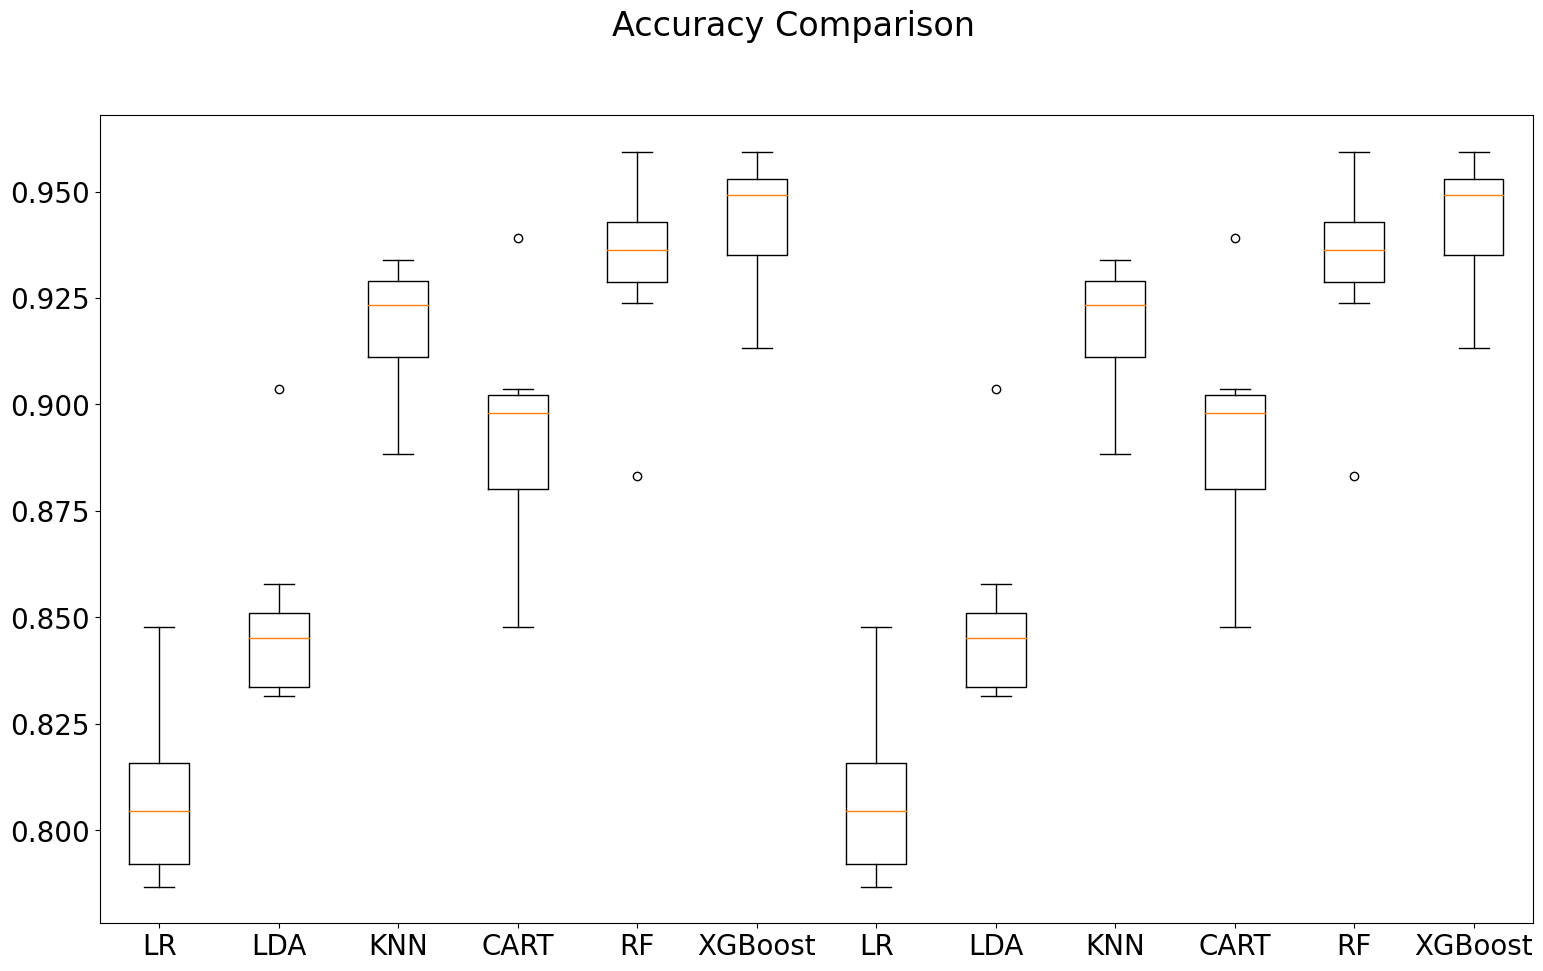

In [37]:
import matplotlib
import matplotlib.pyplot as plt
# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    start = time.time()
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    end = time.time()
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(name,"'s Execution Time: ",end - start, " seconds")


# # boxplot algorithm comparison
# #fig = pyplot.figure(figsize=(10,10))
# fig = pyplot.figure()
# fig.suptitle('Machine Learning algorithm comparison')
# ax = fig.add_subplot(111)
# pyplot.boxplot(results)
# ax.set_xticklabels(names)
# pyplot.show()

# boxplot algorithm comparison
#fig = pyplot.figure(figsize=(10,10))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
# plt.rcParams.update({'font.size': 30})
# fig = pyplot.figure()
fig.suptitle('Accuracy Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('accuracy_comparison.png')
plt.savefig('accuracy_comparison.eps')
plt.show()
fig.show()

LR
LDA
KNN
CART
RF
XGBoost
[10:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

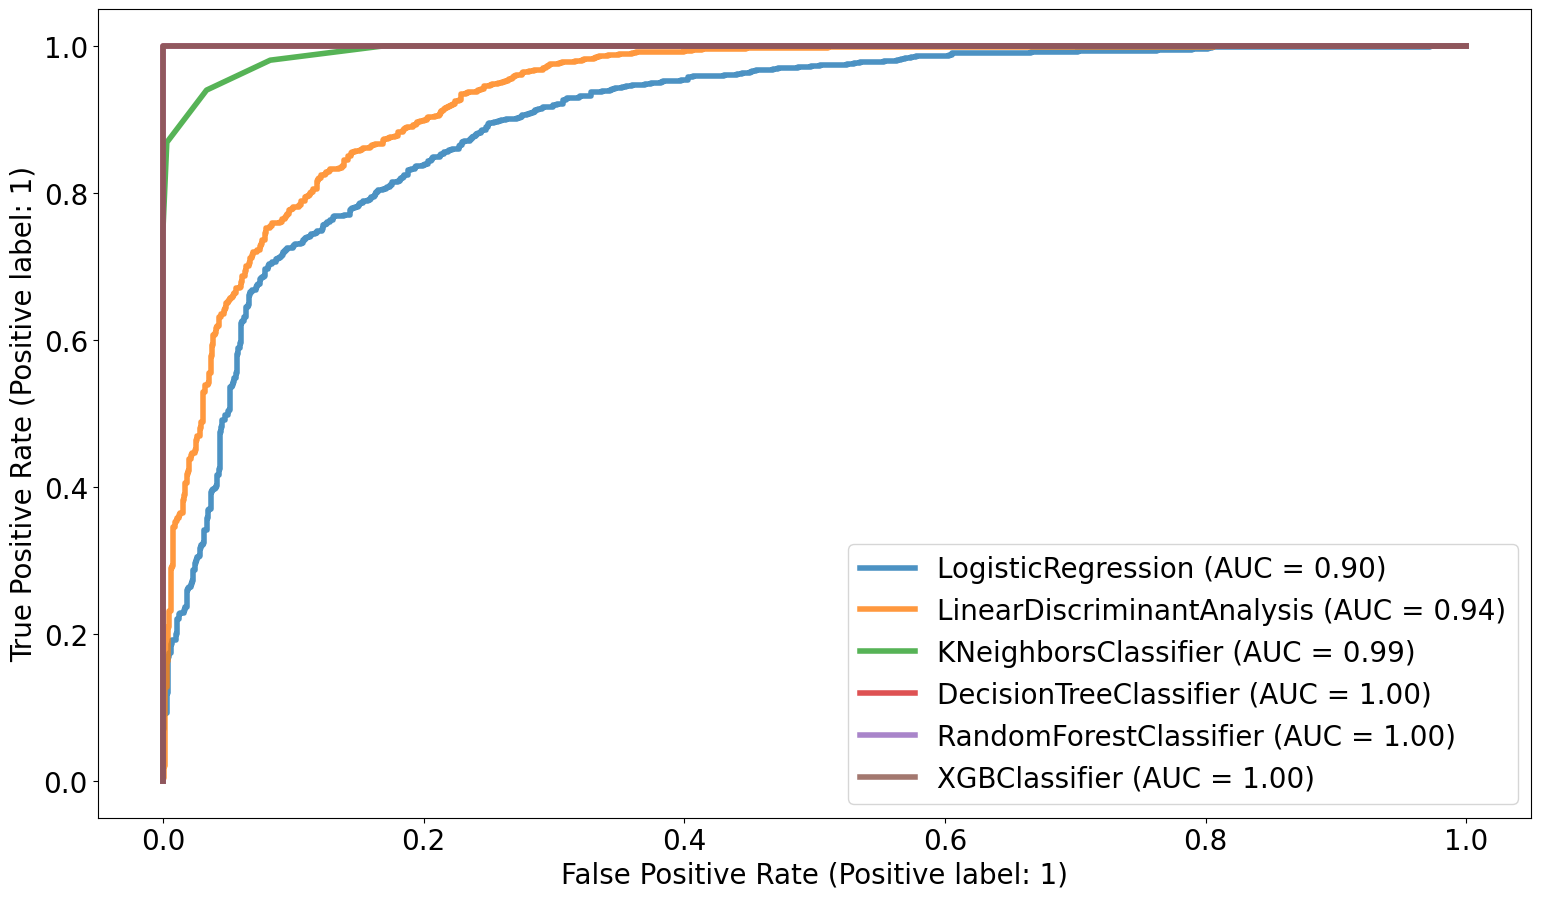

In [42]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# ROC curve generate
ax2 = plt.gca()
for name, model in models:
    print(name)
    model.fit(trainDataGlobal, trainLabelsGlobal)
    roc_disp = RocCurveDisplay.from_estimator(model, trainDataGlobal, trainLabelsGlobal, ax=ax2, alpha=0.8, linewidth=4)


# roc_disp.plot(ax=ax2, alpha=0.8, linewidth=5)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.rcParams.update({'font.size': 20})
plt.savefig('roc_curve.png')
plt.savefig('roc_curve.eps')
plt.show()

In [32]:
clf_XGB =XGBClassifier()
clf_XGB.fit(trainDataGlobal, trainLabelsGlobal)
y_predict_XGB=clf_XGB.predict(testDataGlobal)
cm_XGB = confusion_matrix(testLabelsGlobal,y_predict_XGB)

[22:17:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


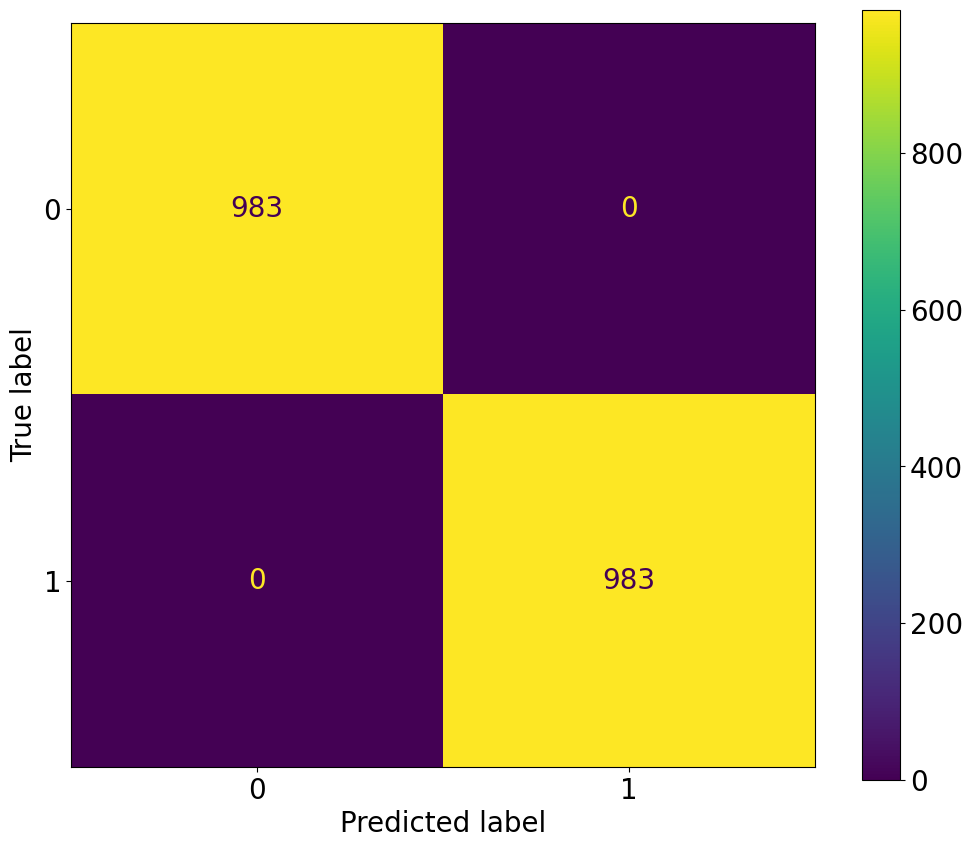

In [33]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, ax = plt.subplots(figsize=(12, 10))
plt.rcParams.update({'font.size': 20})


# plot_confusion_matrix(clf_XGB, trainDataGlobal, trainLabelsGlobal, cmap=plt.cm.Blues, ax = ax) 
# plot_confusion_matrix(clf_XGB, trainDataGlobal, trainLabelsGlobal, cmap=plt.cm.Blues, ax = ax)   
plot_confusion_matrix(clf_XGB, trainDataGlobal, trainLabelsGlobal, ax= ax)   
plt.savefig('cm_xgb.png')
plt.savefig('cm_xgb.eps')
plt.show()

In [35]:
y_predict_xgboost=clf_XGB.predict(testDataGlobal)

In [36]:
print(classification_report(testLabelsGlobal,y_predict_xgboost))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       246
           1       0.96      0.95      0.96       246

    accuracy                           0.96       492
   macro avg       0.96      0.96      0.96       492
weighted avg       0.96      0.96      0.96       492



In [38]:
clf_RF =RandomForestClassifier(n_estimators=num_trees, random_state=seed)
clf_RF.fit(trainDataGlobal, trainLabelsGlobal)
y_predict_RF=clf_RF.predict(testDataGlobal)
cm_RF = confusion_matrix(testLabelsGlobal,y_predict_RF)

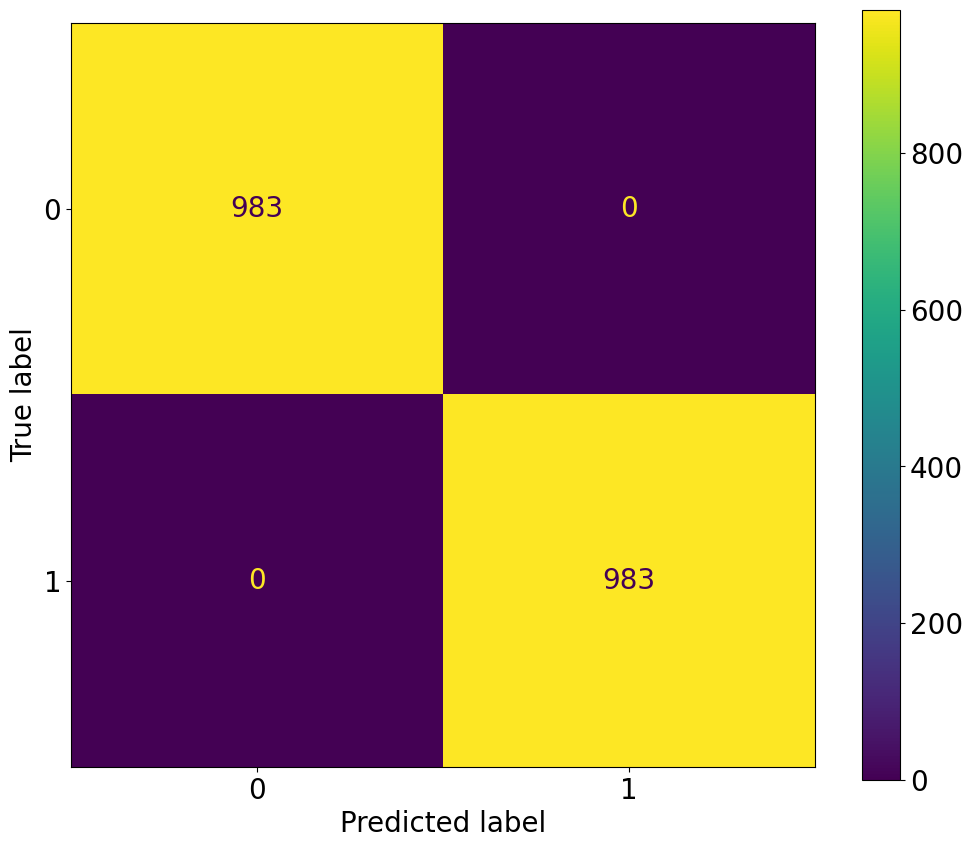

In [39]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, ax = plt.subplots(figsize=(12, 10))
plt.rcParams.update({'font.size': 20})


# plot_confusion_matrix(clf_XGB, trainDataGlobal, trainLabelsGlobal, cmap=plt.cm.Blues, ax = ax) 
# plot_confusion_matrix(clf_XGB, trainDataGlobal, trainLabelsGlobal, cmap=plt.cm.Blues, ax = ax)   
plot_confusion_matrix(clf_RF, trainDataGlobal, trainLabelsGlobal, ax= ax)   
plt.savefig('cm_rf.png')
plt.savefig('cm_rf.eps')
plt.show()

In [40]:
y_predict_rf=clf_RF.predict(testDataGlobal)

In [41]:
print(classification_report(testLabelsGlobal,y_predict_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       246
           1       0.95      0.94      0.95       246

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.95       492
weighted avg       0.95      0.95      0.95       492



In [ ]:
clf_rf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)

In [ ]:
clf_rf.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
y_predict_rf=clf_rf.predict(testDataGlobal)

In [ ]:
# y_predict =['TUMOR', 'STROMA', 'COMPLEX', 'LYMPHO', 'DEBRIS', 'MUCOSA', 'ADIPOSE', 'EMPTY']

In [ ]:
print(classification_report(testLabelsGlobal,y_predict_rf))

In [ ]:
cm_rf = confusion_matrix(testLabelsGlobal,y_predict_rf)

In [ ]:
import seaborn as sns
sns.heatmap(cm_rf ,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testLabelsGlobal, y_predict_rf)

In [ ]:
pd.DataFrame(confusion_matrix(testLabelsGlobal,y_predict),columns= y_test, index= y_pred)


In [ ]:
pd.DataFrame(confusion_matrix(testLabelsGlobal,y_predict),columns=['column 1','column 2','column 3', 'column 4', 'column 5', 'column 6',
                                                                  'column 7', 'column 8'], 
                                                         index=['index 1', 'index 2','index 3', 'index 4', 'index 5','index 6',
                                                               'index 7', 'index 8'])


In [ ]:
clf_lr  = LogisticRegression(random_state=seed)

In [ ]:
clf_lr.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
y_predict_lr=clf_lr.predict(testDataGlobal)

In [ ]:
print(classification_report(testLabelsGlobal,y_predict_lr))

In [ ]:
cm_lr = confusion_matrix(testLabelsGlobal,y_predict_lr)

In [ ]:
import seaborn as sns
sns.heatmap(cm_lr ,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict_lr)

In [ ]:
clf_ldr  = LinearDiscriminantAnalysis()

In [ ]:
clf_ldr.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
y_predict_ldr=clf_ldr.predict(testDataGlobal)

In [ ]:
print(classification_report(testLabelsGlobal,y_predict_ldr))

In [ ]:
cm_ldr = confusion_matrix(testLabelsGlobal,y_predict_ldr)

In [ ]:
import seaborn as sns
sns.heatmap(cm_ldr ,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict_ldr)

In [ ]:
clf_knn  = KNeighborsClassifier()

In [ ]:
clf_knn.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
y_predict_knn=clf_knn.predict(testDataGlobal)

In [ ]:
print(classification_report(testLabelsGlobal,y_predict_knn))

In [ ]:
cm_knn = confusion_matrix(testLabelsGlobal,y_predict_knn)

In [ ]:
import seaborn as sns
sns.heatmap(cm_knn ,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict_knn)

In [ ]:
clf_cart  = DecisionTreeClassifier(random_state=9)

In [ ]:
clf_cart.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
y_predict_cart=clf_cart.predict(testDataGlobal)

In [ ]:
print(classification_report(testLabelsGlobal,y_predict_cart))

In [ ]:
cm_cart = confusion_matrix(testLabelsGlobal,y_predict_cart)

In [ ]:
import seaborn as sns
sns.heatmap(cm_cart ,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict_cart)

In [ ]:
clf_nb  = GaussianNB()

In [ ]:
clf_nb.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
y_predict_nb=clf_nb.predict(testDataGlobal)

In [ ]:
print(classification_report(testLabelsGlobal,y_predict_nb))

In [ ]:
cm_nb = confusion_matrix(testLabelsGlobal,y_predict_nb)

In [ ]:
import seaborn as sns
sns.heatmap(cm_nb ,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict_nb)

In [ ]:
clf_svm  = SVC(random_state=9)

In [ ]:
clf_svm.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
y_predict_svm=clf_svm.predict(testDataGlobal)

In [ ]:
print(classification_report(testLabelsGlobal,y_predict_svm))

In [ ]:
cm_svm = confusion_matrix(testLabelsGlobal,y_predict_svm)

In [ ]:
import seaborn as sns
sns.heatmap(cm_svm ,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict_svm)

In [ ]:
clf_xgboost = XGBClassifier()

In [ ]:
clf_xgboost.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
y_predict_xgboost=clf_xgboost.predict(testDataGlobal)

In [ ]:
print(classification_report(testLabelsGlobal,y_predict_xgboost))

In [ ]:
cm_xgboost = confusion_matrix(testLabelsGlobal,y_predict_xgboost)

In [ ]:
import seaborn as sns
sns.heatmap(cm_xgboost ,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabelsGlobal, y_predict_xgboost)

In [ ]:
models

In [ ]:
# clf_xgboost.predict(testDataGlobal[0].reshape(1,-1))

In [ ]:
# testDataGlobal[0].shape

In [ ]:
# x=clf_xgboost.predict(testDataGlobal[100].reshape(1,-1))

In [ ]:
# x

In [ ]:
# x=int(x)

In [ ]:
# x

In [ ]:
# label =['TUMOR', 'STROMA', 'COMPLEX', 'LYMPHO', 'DEBRIS', 'MUCOSA', 'ADIPOSE', 'EMPTY']

# label[x]

In [ ]:
index = 343
x=clf_rf.predict(testDataGlobal[index].reshape(1,-1))
x_lr=clf_lr.predict(testDataGlobal[index].reshape(1,-1))
x_ldr=clf_ldr.predict(testDataGlobal[index].reshape(1,-1))
x_knn=clf_knn.predict(testDataGlobal[index].reshape(1,-1))
x_cart=clf_cart.predict(testDataGlobal[index].reshape(1,-1))
# x_nb=clf_nb.predict(testDataGlobal[index].reshape(1,-1))
x_svm=clf_svm.predict(testDataGlobal[index].reshape(1,-1))
x_xgboost=clf_xgboost.predict(testDataGlobal[index].reshape(1,-1))

In [ ]:
# x, x_lr , x_ldr, x_knn , x_cart, x_nb , x_svm, x_xgboost
x, x_lr , x_ldr, x_knn , x_cart , x_svm, x_xgboost

In [ ]:
label =['TUMOR', 'STROMA', 'COMPLEX', 'LYMPHO', 'DEBRIS', 'MUCOSA', 'ADIPOSE', 'EMPTY']
# label[int(x)], label[int(x_lr)], label[int(x_ldr)],  label[int(x_knn)], label[int(x_cart)],label[int(x_nb)], label[int(x_svm)], label[int(x_xgboost)]
label[int(x)], label[int(x_lr)], label[int(x_ldr)],  label[int(x_knn)], label[int(x_cart)], label[int(x_svm)], label[int(x_xgboost)]


In [ ]:
import random
import pandas

limit = 50
label =['TUMOR', 'STROMA', 'COMPLEX', 'LYMPHO', 'DEBRIS', 'MUCOSA', 'ADIPOSE', 'EMPTY']
alldata = []
alldata2 = []

rows = []
row_id =[]

for x in range(limit):
    index = random.randint(0,499)
    print("Image Index = ",  index)

    
    x_rf=clf_rf.predict(testDataGlobal[index].reshape(1,-1))
    x_lr=clf_lr.predict(testDataGlobal[index].reshape(1,-1))
    x_ldr=clf_ldr.predict(testDataGlobal[index].reshape(1,-1))
    x_knn=clf_knn.predict(testDataGlobal[index].reshape(1,-1))
    x_cart=clf_cart.predict(testDataGlobal[index].reshape(1,-1))
#     x_nb=clf_nb.predict(testDataGlobal[index].reshape(1,-1))
    x_svm=clf_svm.predict(testDataGlobal[index].reshape(1,-1))
    x_xgboost=clf_xgboost.predict(testDataGlobal[index].reshape(1,-1))
    
    
#     data = [[x_rf], [x_lr], [x_ldr], [x_knn], [x_cart], [x_nb], [x_svm], [x_xgboost]]
#     rows = [index]
    
    data = [x+1, index, [label[int(x_rf)]], [label[int(x_lr)]], [label[int(x_ldr)]], [label[int(x_knn)]], [label[int(x_cart)]], [label[int(x_svm)]], [label[int(x_xgboost)]]] 
    alldata.append(data)
    
    data = [index, [label[int(x_rf)]], [label[int(x_lr)]], [label[int(x_ldr)]], [label[int(x_knn)]], [label[int(x_cart)]], [label[int(x_svm)]], [label[int(x_xgboost)]]] 
    alldata2.append(data)
    
#     data = [x+1, index, [label[int(x_rf)]], [label[int(x_lr)]], [label[int(x_ldr)]], [label[int(x_knn)]], [label[int(x_cart)]], [label[int(x_nb)]], [label[int(x_svm)]], [label[int(x_xgboost)]]] 
#     alldata.append(data)
    
#     data = [index, [label[int(x_rf)]], [label[int(x_lr)]], [label[int(x_ldr)]], [label[int(x_knn)]], [label[int(x_cart)]], [label[int(x_nb)]], [label[int(x_svm)]], [label[int(x_xgboost)]]] 
#     alldata2.append(data)
    
    rows.append(index)
    row_id.append(x+1)
    
#     print(label[int(x_rf)], label[int(x_lr)], label[int(x_ldr)],  label[int(x_knn)], label[int(x_cart)],label[int(x_nb)], label[int(x_svm)], label[int(x_xgboost)], '\n')
    print(label[int(x_rf)], label[int(x_lr)], label[int(x_ldr)],  label[int(x_knn)], label[int(x_cart)], label[int(x_svm)], label[int(x_xgboost)], '\n')

# headers = ['RF', 'LR', 'LDR', 'KNN', 'CART', 'NB', 'SVM', 'XGBoost']
# print(pandas.DataFrame(data, headers, headers)) 


In [ ]:
from tabulate import tabulate

headers = ['ID', 'Index', 'RF', 'LR', 'LDR', 'KNN', 'CART', 'SVM', 'XGBoost']
# headers = ['ID', 'Index', 'RF', 'LR', 'LDR', 'KNN', 'CART', 'NB', 'SVM', 'XGBoost']

print (tabulate(alldata, headers))

In [ ]:
import numpy
import pandas

#  x = numpy.array([[85, 86, 87, 88, 89], 
#                  [90, 191, 192, 93, 94], 
#                  [95, 96, 97, 98, 99], 
#                  [100,101,102,103,104]])

x = numpy.array(alldata2)

# row_labels = ['Z', 'Y', 'X', 'W']
#row_labels = numpy.array(rows)

column_labels = ['Index', 'RF', 'LR', 'LDR', 'KNN', 'CART', 'SVM', 'XGBoost']


df = pandas.DataFrame(x, columns=column_labels)
df


In [ ]:
#!pip install xgboost

In [ ]:
# from xgboost import XGBClassifier

# # fit model no training data
# clf_xgboost = XGBClassifier()
# clf_xgboost.fit(trainDataGlobal, trainLabelsGlobal)

In [ ]:
# y_predict_xgboost=clf_xgboost.predict(testDataGlobal)

In [ ]:
# print(classification_report(testLabelsGlobal,y_predict_xgboost))

In [ ]:
# cm_xgboost = confusion_matrix(testLabelsGlobal,y_predict_xgboost)

In [ ]:
# import seaborn as sns
# sns.heatmap(cm_xgboost ,annot=True)

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(testLabelsGlobal, y_predict_xgboost)

In [ ]:
models.summary()